# Data Integration

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%cd ./data/

In [ ]:
# Reading Product Data
data1 = pd.read_csv('dataset/products-data-0.tsv',sep='\t', header=None, names=["id", "category", "product_title"])
data2 = pd.read_csv('dataset/products-data-1.tsv',sep='\t', header=None, names=["id", "category", "product_title"])
data3 = pd.read_csv('dataset/products-data-2.tsv',sep='\t', header=None, names=["id", "category", "product_title"])
data4 = pd.read_csv('dataset/products-data-3.tsv',sep='\t', header=None, names=["id", "category", "product_title"])

# Reading Reviews
review1 = pd.read_csv('dataset/reviews-0.tsv',sep='\t', header=None, names=["id", "rating", "review_text"])
review2 = pd.read_csv('dataset/reviews-1.tsv',sep='\t', header=None, names=["id", "rating", "review_text"])
review3 = pd.read_csv('dataset/reviews-2.tsv',sep='\t', header=None, names=["id", "rating", "review_text"])
#swap two columns of review3
temp = review3["id"].copy()
review3["id"] = review3["rating"]
review3["rating"] = temp
review4 = pd.read_csv('dataset/reviews-3.tsv',sep='\t', header=None, names=["id", "rating", "review_text"])

In [ ]:
print("Product data shape: \n", data1.shape, data2.shape, data3.shape, data4.shape)
print("Reviews shape: \n", review1.shape, review2.shape, review3.shape, review4.shape)

Product data shape: 
 (500, 3) (500, 3) (500, 3) (254, 3)
Reviews shape: 
 (500, 3) (500, 3) (500, 3) (254, 3)


In [ ]:
set(data1['category']), set(data2['category']), set(data3['category']), set(data4['category'])

({'Jewelry', 'Kitchen'},
 {'Jewelry', 'Kitchen'},
 {'Jewelry', 'Kitchen'},
 {'Jewelry', 'Ktchen'})

In [ ]:
data4["category"].loc[data4["category"]=="Ktchen"]='Kitchen'

In [ ]:
set(data1['category']), set(data2['category']), set(data3['category']), set(data4['category'])

({'Jewelry', 'Kitchen'},
 {'Jewelry', 'Kitchen'},
 {'Jewelry', 'Kitchen'},
 {'Jewelry', 'Kitchen'})

In [ ]:
data = pd.concat([data1, data2, data3, data4], axis=0).reset_index(drop=True)
review = pd.concat([review1, review2, review3, review4], axis=0).reset_index(drop=True)

print(len(data), len(review))

1754 1754


In [ ]:
# Check id columns in two corpus
counter = 0
for i in range(len(data)):
    if data['id'].values[i] != review['id'].values[i]:
        counter+=1
if counter > 0:
    print("ID column in Data and Review corpus is not mach two each other!")
else:
    print("ID column in Data and Review corpus is mach two each other!")

ID column in Data and Review corpus is mach two each other!


In [ ]:
# Check duplicate id
print(len(data['id']), len(set(data['id'])))

1754 1754


In [ ]:
data.columns

Index(['id', 'category', 'product_title'], dtype='object')

In [ ]:
review.columns

Index(['id', 'rating', 'review_text'], dtype='object')

In [ ]:
# Data combination
data = pd.concat([data, review[['rating', 'review_text']]], axis=1)

In [ ]:
# Save to CSV
data.to_csv('final data.csv', index=False)

In [ ]:
# Final data
data.head()

,id,category,product_title,rating,review_text
0,daa54754-af9c-41c0-b542-fe5eabc5919c,Kitchen,Bodum Travel Press 12-Ounce French Press Coffe...,5,Great!
1,ab602aca-9bad-4aa9-bd42-6ce24cdf8680,Kitchen,RH Forschner by Victorinox BladeSafe for Knife...,5,It fit perfectly on my new<br />Victorinox Fib...
2,f98cd8d3-d6fe-4ee3-8c9f-a18c1690f7a6,Kitchen,Bellemain 12-Cup Nonstick Madeleine Pan,5,Excellent pan - my daughter just made madelein...
3,396f73e3-e3ef-4c93-a4b7-e8b04c6a2223,Jewelry,8mm Heat Treated Agate Beads Tibetan Buddhist ...,3,not the good one but not bad
4,329ed5e3-8b47-4e78-961b-18b89e7da808,Jewelry,2.50 Ct Oval Black Onyx 925 Sterling Silver Pe...,1,This is a rip off. It only comes with this nec...


In [ ]:
data['product_title'][0]

'Bodum Travel Press 12-Ounce French Press Coffeemaker, Black'

In [ ]:
# Check range of rating column
set(data['rating'].values)

{1, 2, 3, 4, 5}

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

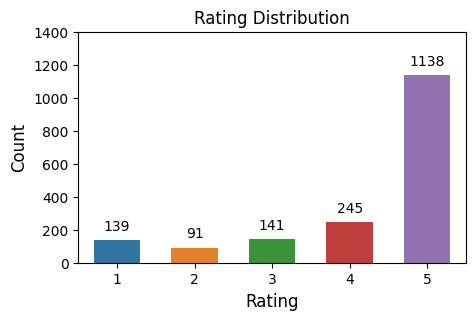

In [ ]:
fig = plt.figure(1,figsize=(5, 3))
ax = sns.countplot(x='rating', data=data, width=0.6)
ax.set_xlabel('Rating', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Rating Distribution')
ax.set_ylim(0, 1400)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

In [ ]:
list(data['category'].values).count('Jewelry'), list(data['category'].values).count('Kitchen')

(870, 884)

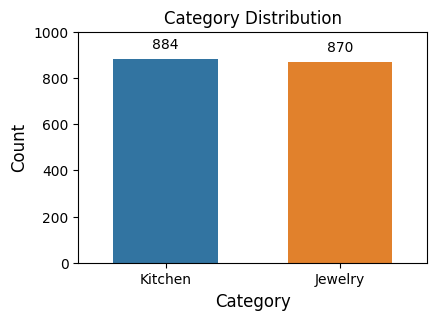

In [ ]:
fig = plt.figure(1,figsize=(4.5, 3))
ax = sns.countplot(x='category', data=data, width=0.6)
ax.set_xlabel('Category', fontsize=12)
ax.set_ylabel('Count', fontsize=12)
ax.set_title('Category Distribution')
ax.set_ylim(0, 1000)
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()

# Data Preprocessing

In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import re # Regular Expressions - searching, matching, and manipulating strings in text
import string
import nltk
from sklearn.preprocessing import StandardScaler
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer # Lemmatization
nltk.download('stopwords')  # Download the stopwords resources
nltk.download('wordnet')  # Download the wordnet resources - semantic information and similarity of words
nltk.download('punkt')  # Download the punkt resources for tokenization

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def text_lowercase(text):
    return text.lower()

# Cleaning the text from emails, symbols, and web links
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def remove_numbers(text):
    result = re.sub(r'\d+', '', text)
    return result

# Cleaning punctuation marks from the text - retaining only letters and numbers.
def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

s1 = stopwords.words('english')
stop_words = list(set(s1))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_numbers(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    # text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

In [ ]:
# Product_title cleaning
count =0
documents = []

for entry in tqdm(data['product_title']):
    count += 1
    documents.append(preprocessing(str(entry)))

data['product_title'] = documents

100%|██████████| 1754/1754 [00:04<00:00, 428.21it/s] 


In [ ]:
print(data1['product_title'][11])
print(data['product_title'][11])

Silver-tone Cross With Caduceus Emblem Nurse Pen - Perfect Nurse Gift
silver tone cross with caduceus emblem nurse pen perfect nurse gift


In [ ]:
# Review_text cleaning
count =0
documents1 = []

for entry in tqdm(data['review_text']):
    count += 1
    documents1.append(preprocessing(str(entry)))

data['review_text'] = documents1

100%|██████████| 1754/1754 [00:01<00:00, 1125.53it/s]


In [ ]:
print(review1['review_text'][2])
print(data['review_text'][2])

Excellent pan - my daughter just made madeleines - yum!
excellent pan my daughter just made madeleines yum


# Data Preparation for Model Training

In [ ]:
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from gensim.models import FastText
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalization for rating column
# scaler = StandardScaler()
# data['rating'] = scaler.fit_transform(data['rating'].values.reshape(-1, 1))

In [ ]:
data["rating"].loc[data["rating"]==1]=-1.0
data["rating"].loc[data["rating"]==2]=-0.5
data["rating"].loc[data["rating"]==3]=0.0
data["rating"].loc[data["rating"]==4]=0.5
data["rating"].loc[data["rating"]==5]=-1.0

In [ ]:
# Numbering the Category column
data["category"].loc[data["category"]=="Kitchen"]=1.0
data["category"].loc[data["category"]=="Jewelry"]=0.0

In [ ]:
# Text Tokenization
max_words = 10000  # Maximum number of allowed words

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(data['product_title'] + ' ' + data['review_text'])

# Convert text to numerical vectors
X_text_sequences = tokenizer.texts_to_sequences(data['product_title'] + ' ' + data['review_text'])

In [ ]:
print(X_text_sequences[0])

[2457, 498, 274, 327, 480, 274, 1440, 52, 29]


In [ ]:
temp = []
for i in X_text_sequences:
    temp.append(len(i))
text_counts = [temp.count(i) for i in list(set(temp))]
print("Max length: ", max(temp), "\nMin length: ", min(temp))

Max length:  623 
Min length:  5


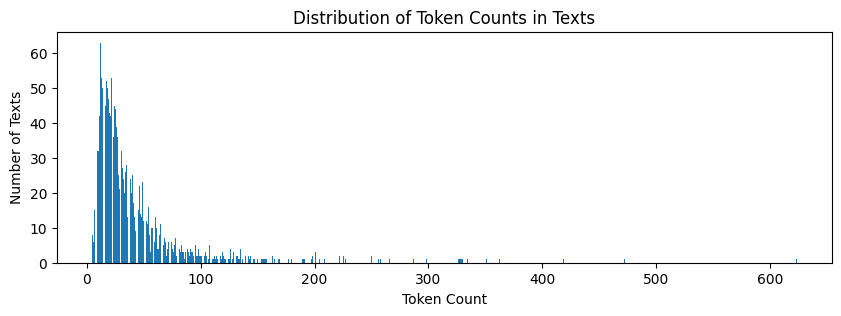

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 3))
plt.bar(list(set(temp)), text_counts, width=0.8)

plt.xlabel('Token Count')
plt.ylabel('Number of Texts')
plt.title('Distribution of Token Counts in Texts')

plt.show()


In [ ]:
# Train FastText model
sentences = [text.split() for text in data['product_title'] + ' ' + data['review_text']]
fasttext_model = FastText(sentences, vector_size=64, window=5, min_count=1, workers=4)

# Create an Embedding matrix
embedding_matrix = np.zeros((max_words, 64))
for word, i in tokenizer.word_index.items():
    if i < max_words:
        if word in fasttext_model.wv:
            embedding_matrix[i] = fasttext_model.wv[word]

# Convert data to numerical features using "Bag of Words" Embedding method
X_embedding = np.array([np.mean([embedding_matrix[i] for i in text], axis=0) for text in X_text_sequences])

# Concatenate Embedding features with ratings
X_embedding = np.concatenate([X_embedding, data['rating'].values.reshape(-1, 1)], axis=1)

In [ ]:
X_embedding.shape

(1754, 65)

In [ ]:
# Save prepared data
import pickle
with open('X_data.pkl', 'wb') as f:
   pickle.dump(X_embedding, f)
with open('y_data.pkl', 'wb') as f:
   pickle.dump(data['category'].values.astype("float64"), f)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_embedding, data['category'].values.astype("float64"), test_size=0.2, random_state=42)

print("X_train shape", X_train.shape, "\nX_test shape", X_test.shape)

X_train shape (1403, 65) 
X_test shape (351, 65)


In [ ]:
list(y_train).count(0), list(y_train).count(1)

(708, 695)

In [ ]:
list(y_test).count(0), list(y_test).count(1)

(162, 189)

# Model Training and Evaluation

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
all_accuracy, all_precision, all_recall, all_f1score = [], [], [], []

In [ ]:
def model_evaluation(y_pred, model_name):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)

    all_accuracy.append(accuracy)
    all_precision.append(precision)
    all_recall.append(recall)
    all_f1score.append(f1score)

    print(model_name, ' evaluation:', '\n')
    print(f'Test accuracy: {accuracy * 100:.2f}%')
    print(f'Test precision: {precision * 100:.2f}%')
    print(f'Test recall: {recall * 100:.2f}%')
    print(f'Test f1 score: {f1score * 100:.2f}%')

In [ ]:
def result_matrix(y_pred, model_name):
    cnf_matrix = confusion_matrix(y_test, y_pred)

    fig = plt.figure(1,figsize=(4.5, 3))
    ax = plt.subplot()
    sns.heatmap(cnf_matrix, annot=True, fmt="d", cmap="Blues", annot_kws={"size": 15}, ax=ax)
    ax.set_xlabel('Predicted label', fontsize=12)
    ax.set_ylabel('True label', fontsize=12)
    ax.set_title(model_name, fontsize=15, pad=20)
    ax.set_xticklabels
    ax.set_xticklabels(["Jewelry", "Kitchen"], rotation=45)
    ax.set_yticklabels(["Jewelry", "Kitchen"], rotation=0)
    plt.show()

## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_name = "Logistic Regression"

# Create param grid
param_grid = {
    "C": np.logspace(-4,4,20),
    "penalty": ["l1","l2"]
}

# Create LogisticRegression object
logreg = LogisticRegression()

# Create grid search object
logreg_cv = GridSearchCV(logreg, param_grid, cv=10)

# Fit on train data
logreg_cv.fit(X_train, y_train)

print("Tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print(f"Best cross validation accuracy: {logreg_cv.best_score_ * 100:.2f}")

Tuned hpyerparameters :(best parameters)  {'C': 10000.0, 'penalty': 'l2'}
Best cross validation accuracy: 94.30


In [ ]:
# Predict on the test set
y_pred = logreg_cv.best_estimator_.predict(X_test)

# Evaluate the final model accuracy on the test set
model_evaluation(y_pred, model_name)

Logistic Regression  evaluation: 

Test accuracy: 96.30%
Test precision: 95.36%
Test recall: 97.88%
Test f1 score: 96.61%


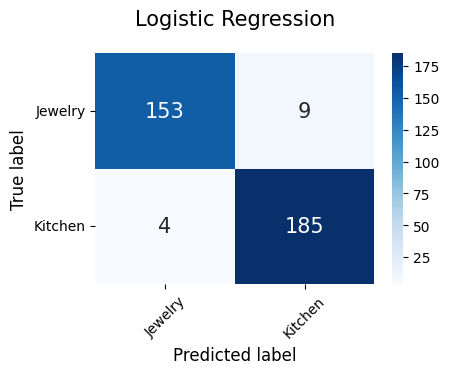

In [ ]:
result_matrix(y_pred, model_name)

## Gaussian Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

model_name = "Gaussian Naive Bayes"

gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Predict on the test set
y_pred = gnb.predict(X_test)

# Evaluate the final model accuracy on the test set
model_evaluation(y_pred, model_name)

Gaussian Naive Bayes  evaluation: 

Test accuracy: 80.34%
Test precision: 77.78%
Test recall: 88.89%
Test f1 score: 82.96%


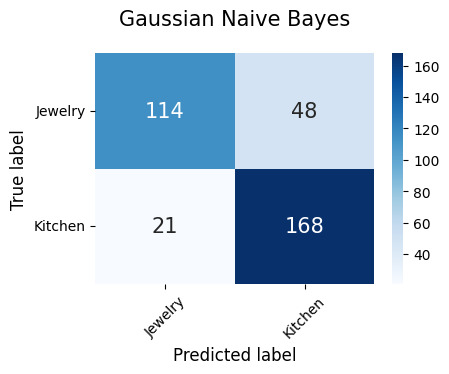

In [ ]:
result_matrix(y_pred, model_name)

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_name = "Random Forest"

# Create param grid for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 10]
}

# Create RandomForestClassifier object
rf_classifier = RandomForestClassifier()

# Create grid search object
rf_cv = GridSearchCV(rf_classifier, param_grid, cv=10)

# Fit on train data
rf_cv.fit(X_train, y_train)

print("Tuned hyperparameters (best parameters): ", rf_cv.best_params_)
print(f"Best cross-validation accuracy: {rf_cv.best_score_ * 100:.2f}")

Tuned hyperparameters (best parameters):  {'max_depth': 10, 'n_estimators': 100}
Best cross-validation accuracy: 86.31


In [ ]:
# Predict on the test set
y_pred = rf_cv.best_estimator_.predict(X_test)

# Evaluate the final model accuracy on the test set
model_evaluation(y_pred, model_name)

Random Forest  evaluation: 

Test accuracy: 87.18%
Test precision: 87.89%
Test recall: 88.36%
Test f1 score: 88.13%


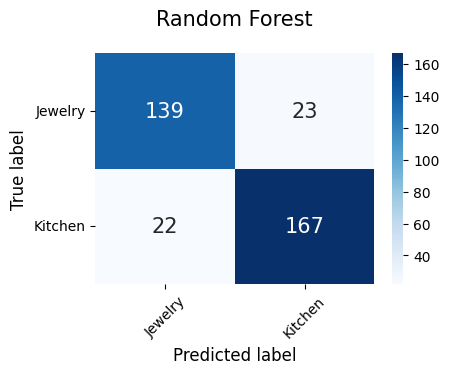

In [ ]:
result_matrix(y_pred, model_name)

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_name = "Decision Tree"

# Create param grid for DecisionTreeClassifier
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'random_state':[42]
}

# Create DecisionTreeClassifier object
dt_classifier = DecisionTreeClassifier()

# Create grid search object
dt_cv = GridSearchCV(dt_classifier, param_grid, cv=10)

# Fit on train data
dt_cv.fit(X_train, y_train)

print("Tuned hyperparameters (best parameters): ", dt_cv.best_params_)
print(f"Best cross-validation accuracy: {dt_cv.best_score_ * 100:.2f}")

Tuned hyperparameters (best parameters):  {'criterion': 'gini', 'max_depth': None, 'random_state': 42}
Best cross-validation accuracy: 82.75


In [ ]:
# Predict on the test set
y_pred = dt_cv.best_estimator_.predict(X_test)

# Evaluate the final model accuracy on the test set
model_evaluation(y_pred, model_name)

Decision Tree  evaluation: 

Test accuracy: 84.90%
Test precision: 86.56%
Test recall: 85.19%
Test f1 score: 85.87%


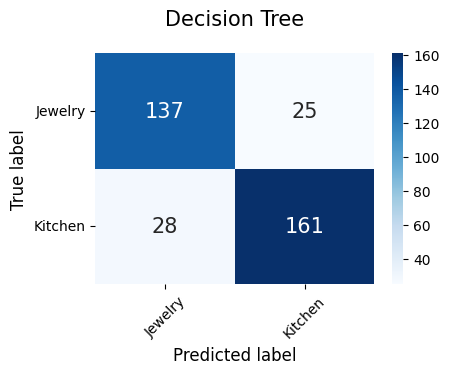

In [ ]:
result_matrix(y_pred, model_name)

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model_name = "K-Nearest Neighbors"

# Create param grid for KNeighborsClassifier
param_grid = {
    'n_neighbors': np.arange(3, 10),
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Create KNeighborsClassifier object
knn_classifier = KNeighborsClassifier()

# Create grid search object
knn_cv = GridSearchCV(knn_classifier, param_grid, cv=10)

# Fit on train data
knn_cv.fit(X_train, y_train)

print("Tuned hyperparameters (best parameters): ", knn_cv.best_params_)
print(f"Best cross-validation accuracy: {knn_cv.best_score_ * 100:.2f}")

Tuned hyperparameters (best parameters):  {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best cross-validation accuracy: 80.25


In [ ]:
# Predict on the test set
y_pred = knn_cv.best_estimator_.predict(X_test)

# Evaluate the final model accuracy on the test set
model_evaluation(y_pred, model_name)

K-Nearest Neighbors  evaluation: 

Test accuracy: 83.19%
Test precision: 84.57%
Test recall: 84.13%
Test f1 score: 84.35%


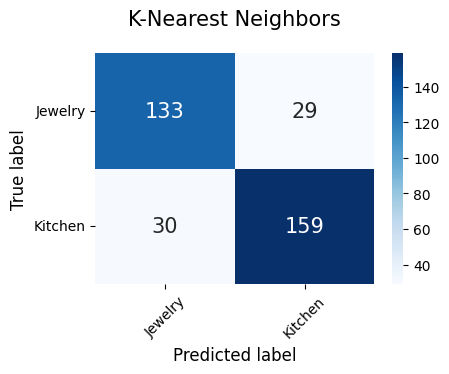

In [ ]:
result_matrix(y_pred, model_name)

## Support Vector Machines (SVM)

In [ ]:
from sklearn.svm import SVC

model_name = "Support Vector Machines"

# Create param grid for SVM
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto'],
}

# Create SVC object
svm_classifier = SVC()

# Create grid search object
svm_cv = GridSearchCV(svm_classifier, param_grid, cv=10)

# Fit on train data
svm_cv.fit(X_train, y_train)

print("Tuned hyperparameters (best parameters): ", svm_cv.best_params_)
print(f"Best cross-validation accuracy: {svm_cv.best_score_ * 100:.2f}")

Tuned hyperparameters (best parameters):  {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation accuracy: 85.17


In [ ]:
# Predict on the test set
y_pred = svm_cv.best_estimator_.predict(X_test)

# Evaluate the final model accuracy on the test set
model_evaluation(y_pred, model_name)

Support Vector Machines  evaluation: 

Test accuracy: 86.32%
Test precision: 84.39%
Test recall: 91.53%
Test f1 score: 87.82%


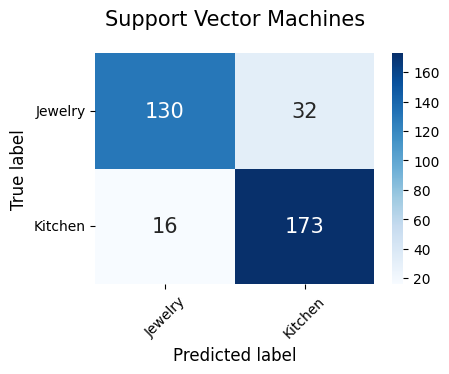

In [ ]:
result_matrix(y_pred, model_name)

# Model Comparison and Visualization

In [ ]:
all_accuracy

[0.9629629629629629,
 0.8034188034188035,
 0.8717948717948718,
 0.8490028490028491,
 0.8319088319088319,
 0.8632478632478633]

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

def result_diagram(selected_metric, metric_name, selected_color):
    # Create a subplot with a specified size
    fig, ax = plt.subplots(figsize=(6, 3))

    # List of model names for the x-axis
    names = ['LR', 'GNB', 'RF', 'DT', 'KNN', 'SVC']

    # Plotting accuracy values for each model
    ax.plot(names, selected_metric, c=selected_color, marker='o')

    # Adding accuracy values as text labels above each point on the plot
    for i, txt in enumerate(selected_metric):
        ax.text(names[i], selected_metric[i], str(round(txt, 4)), ha='center', va='bottom')

    # Set plot title and labels for the x and y axes
    ax.set_title('Models Comparison '+'('+metric_name+')', fontsize=15, pad=20)
    ax.set_xlabel('Models', fontsize=12)
    ax.set_ylabel(metric_name, fontsize=12)

    # Set the y-axis limits
    ax.set_ylim(0.6, 1)

    # Set font size for x-axis and y-axis tick labels
    ax.set_xticklabels(names, fontsize=8)
    ax.set_yticklabels(ax.get_yticks(), fontsize=8)

    # Format y-axis ticks to display accuracy values with two decimal places
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

    # Display the plot
    plt.show()

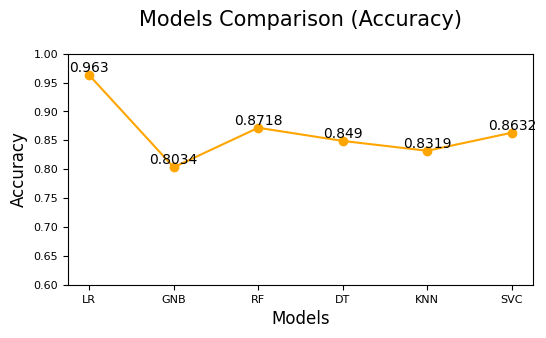

In [ ]:
result_diagram(all_accuracy, "Accuracy", "orange")

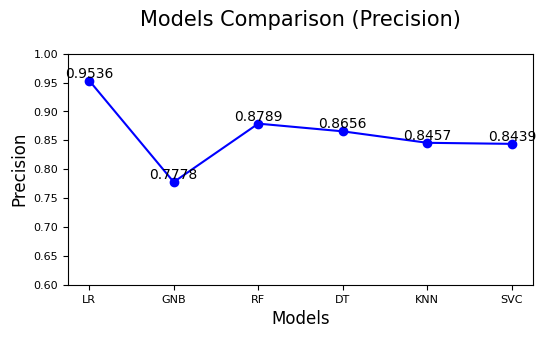

In [ ]:
result_diagram(all_precision, "Precision", "blue")

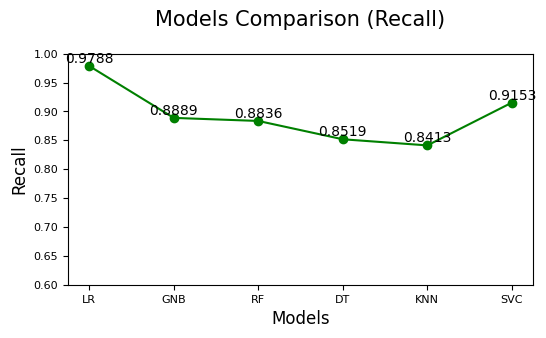

In [ ]:
result_diagram(all_recall, "Recall", 'green')

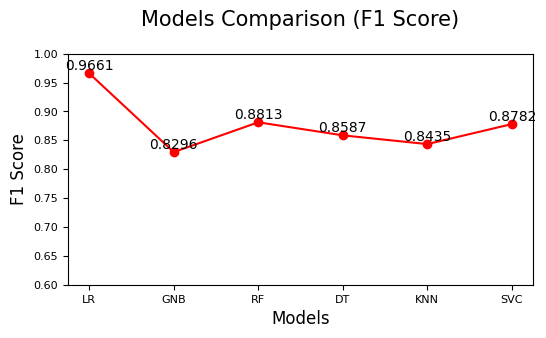

In [ ]:
result_diagram(all_f1score, "F1 Score", "red")